# Plot results

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_theme()

In [47]:
yhat_df = pd.read_parquet('yhat_df.parquet')
df = pd.read_parquet('data/silver/df.parquet')

In [48]:
# Combine clean data and yhat
df = pd.concat([df, yhat_df])
df.head(3)

,24h_later_forecast,24h_later_load,yhat
2014-10-23 00:00:00+02:00,NaN,6522.0,NaN
2014-10-23 01:00:00+02:00,NaN,6342.0,NaN
2014-10-23 02:00:00+02:00,NaN,6269.0,NaN


Text(0, 0.5, 'Next-hour load [MW]')

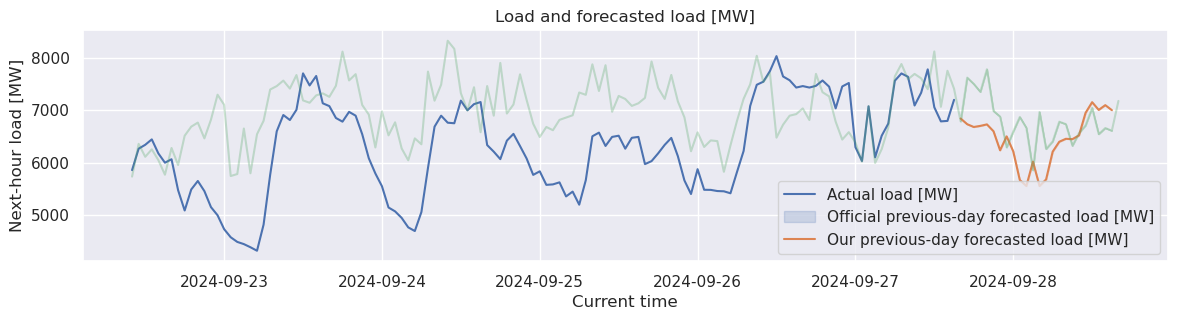

In [53]:
plt.figure(figsize=(14,3))
_df = df[df.index > pd.Timestamp(datetime.now(), tz='Europe/Zurich') - pd.Timedelta(7, 'd')]
sns.lineplot(x=_df.index + pd.Timedelta(1, 'd'), y=_df['24h_later_load'], errorbar=('ci', False))
sns.lineplot(x=_df.index + pd.Timedelta(1, 'd'), y=_df['yhat'], errorbar=('ci', False))
sns.lineplot(x=_df.index + pd.Timedelta(1, 'd'), y=_df['24h_later_forecast'], alpha=0.3, errorbar=('ci', False))
plt.legend([
    'Actual load [MW]',
    'Official previous-day forecasted load [MW]',
    'Our previous-day forecasted load [MW]',
])
plt.title('Load and forecasted load [MW]')
plt.xlabel('Current time')
plt.ylabel('Next-hour load [MW]')